In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.shape

(400, 5)

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [6]:
## Encoding 	Gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


<Axes: >

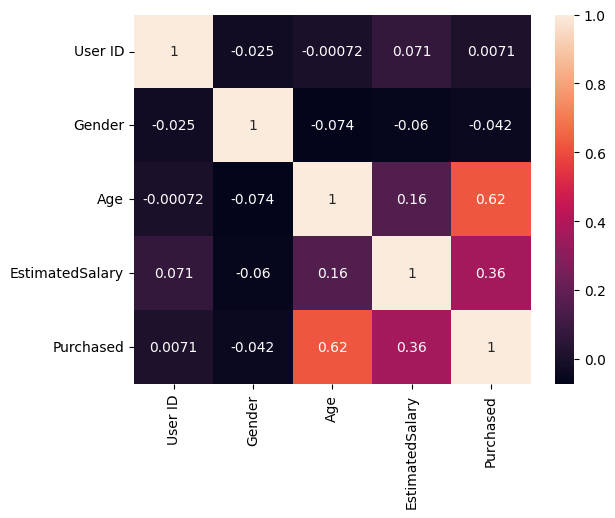

In [7]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)


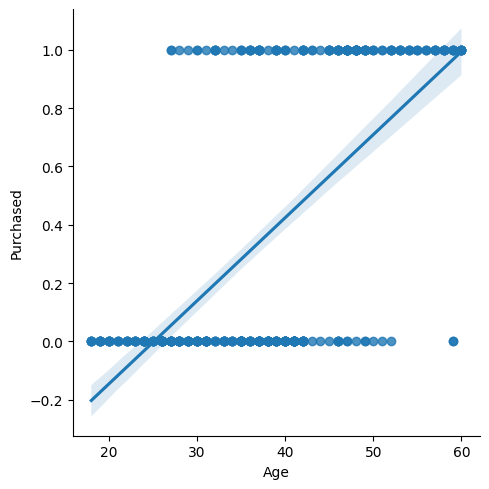

In [8]:
sns.lmplot(data = data, x= 'Age', y= 'Purchased')

In [9]:
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from math import sqrt, ceil
k = sqrt(y_train.shape[0])
k = ceil(k)
k = 5
k

5

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
pred_df = X_test.copy()
pred_df['Act'] = y_test
pred_df['Pred'] = knn.predict(X_test)

In [14]:
pred_df

,Age,EstimatedSalary,Act,Pred
209,46,22000,0,1
280,59,88000,1,1
33,28,44000,0,0
210,48,96000,1,1
93,29,28000,0,0
...,...,...,...,...
60,27,20000,0,0
79,26,17000,0,0
285,37,93000,1,1
305,42,54000,0,0


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(pred_df['Act'], pred_df['Pred'])
print(cm)

[[69  4]
 [18 29]]


In [16]:
cr = classification_report(pred_df['Act'], pred_df['Pred'])
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        73
           1       0.88      0.62      0.72        47

    accuracy                           0.82       120
   macro avg       0.84      0.78      0.79       120
weighted avg       0.83      0.82      0.81       120



## Scree plot for k

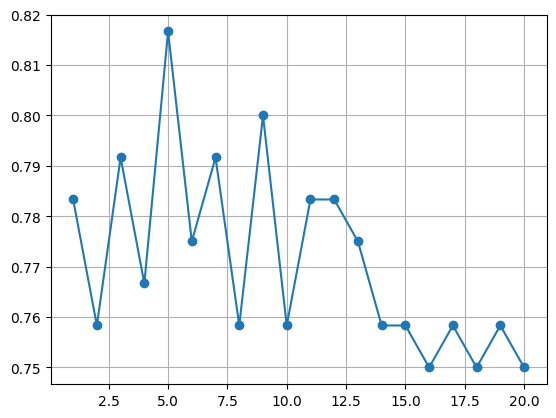

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

scores = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.plot(range(1,21), scores, marker='o')
plt.grid()
plt.show()
